# Commonly Used tf.Keras Functionality

This notebooks contains commonly used `tf.keras` functionality to develop a neural network model using `keras` as the API and `tensorflow` as the backend.

## Importing Modules

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [28]:
keras.__version__

'2.11.0'

## Example: Building a Classifier and Regressor Using the Sequential API

#### **Importing the Dataset using `tf.keras.datasets`**

In [29]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### **Creating the model using the Sequential API**

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7099 - accuracy: 0.7658 - val_loss: 0.5097 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4851 - accuracy: 0.8314 - val_loss: 0.4548 - val_accuracy: 0.8390
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4421 - accuracy: 0.8451 - val_loss: 0.4058 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4162 - accuracy: 0.8540 - val_loss: 0.3999 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3951 - accuracy: 0.8608 - val_loss: 0.3937 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3792 - accuracy: 0.8660 - val_loss: 0.3875 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3659 - accuracy: 0.8695 - val_loss: 0.3988 - val_accuracy:

Simple plot of training history:

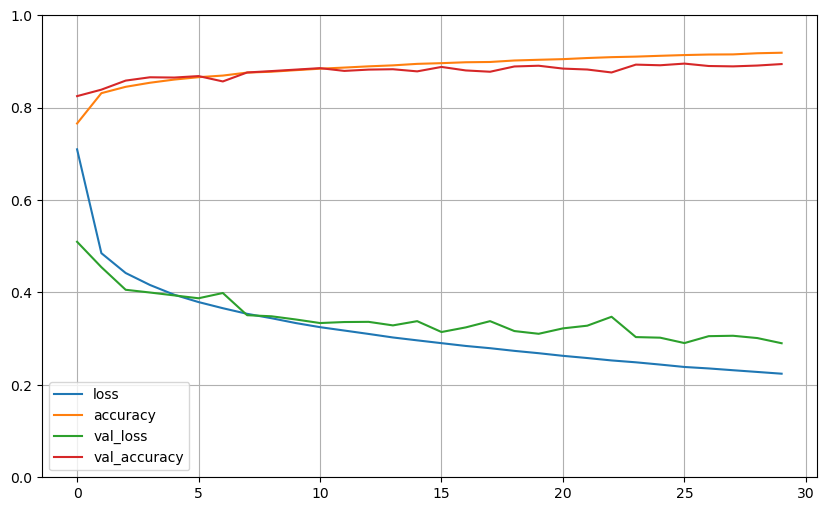

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluate the model using testing set:

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 58.0185 - accuracy: 0.8555


[58.01850509643555, 0.8554999828338623]

#### **Creating the model using the Functional API**

Keras' `Functional API` provides a more flexible way of creating a neural network model. We will try to develop a *Wide & Deep* neural network using Keras' Functional API.

![](assets\wide-deep-model.png)
*source:  [Papers With Code](https://paperswithcode.com/method/wide-deep)


In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# fetching California Dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
    )
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
    )
# scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
# functional API
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
# compiling model
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-4))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 3.3601 - val_loss: 2.8738
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 2.2367 - val_loss: 2.1794
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 1.6342 - val_loss: 1.7762
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3021 - val_loss: 1.4778
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 1.1073 - val_loss: 1.2623
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9843 - val_loss: 1.1088
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9023 - val_loss: 1.0000
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8452 - val_loss: 0.9227
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8042 - val_loss: 0.8704
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7742 - val_loss: 0.8336

In [36]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.6386


0.6386138200759888

#### **Multi Input/Output NN using Subclassing API**

Even more flexible model using `Subclassing API`:

In [37]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# dataset
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# model
model = WideAndDeepModel()
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
model.call([input_A, input_B])
# compiling model
model.compile(
    loss=['mse', 'mse'], loss_weights=[0.9, 0.1],
    optimizer='sgd'
    )
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 1.0136 - output_1_loss: 0.9136 - output_2_loss: 1.9140 - val_loss: 0.7200 - val_output_1_loss: 0.6486 - val_output_2_loss: 1.3629
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5572 - output_1_loss: 0.4941 - output_2_loss: 1.1250 - val_loss: 1.4893 - val_output_1_loss: 1.5268 - val_output_2_loss: 1.1516
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5421 - output_1_loss: 0.4937 - output_2_loss: 0.9776 - val_loss: 3.4047 - val_output_1_loss: 3.6156 - val_output_2_loss: 1.5068
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6611 - output_1_loss: 0.6317 - output_2_loss: 0.9258 - val_loss: 0.5768 - val_output_1_loss: 0.5261 - val_output_2_loss: 1.0333
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4724 - output_1_loss: 0.4351 - output_2_loss: 0.8087 - val_loss: 0.5786 - val_output_1_loss: 0.5495 - val_ou

In [38]:
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(
    f'total loss: {total_loss:.2f}\n'
    f'main_loss: {main_loss:.2f}\n'
    f'aux_loss: {aux_loss:.2f}'
)

162/162 [==============================] - 0s 2ms/step - loss: 0.3883 - output_1_loss: 0.3720 - output_2_loss: 0.5348
total loss: 0.39
main_loss: 0.37
aux_loss: 0.53


#### **Early Stopping using keras.callbacks.EarlyStopping**


Keras provides various callbacks that can be implemented to improve our neural net learning process. In this example, we will implement `EarlyStopping`:

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=200,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    callbacks=[early_stopping_cb]
    )

Epoch 1/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3765 - output_1_loss: 0.3583 - output_2_loss: 0.5406 - val_loss: 0.4087 - val_output_1_loss: 0.3912 - val_output_2_loss: 0.5657
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3728 - output_1_loss: 0.3546 - output_2_loss: 0.5362 - val_loss: 0.4087 - val_output_1_loss: 0.3917 - val_output_2_loss: 0.5617
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3698 - output_1_loss: 0.3526 - output_2_loss: 0.5247 - val_loss: 0.4016 - val_output_1_loss: 0.3849 - val_output_2_loss: 0.5518
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3644 - output_1_loss: 0.3472 - output_2_loss: 0.5193 - val_loss: 0.4361 - val_output_1_loss: 0.4215 - val_output_2_loss: 0.5675
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3616 - output_1_loss: 0.3450 - output_2_loss: 0.5118 - val_loss: 0.4133 - val_output_1_loss: 0.3980 - v

#### **Utilizing TensorBoard for Visualization Aid**

Tensorflow provides `TensorBoard` for a visualization of training history:

In [40]:
import os
root_logdir = os.path.join(os.curdir, 'run_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=200,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    callbacks=[early_stopping_cb, tensorboard_cb], verbose=0
    )


Let's create another model to create comparative visualization of different optimizers.

In [41]:
model.compile(
    loss=['mse', 'mse'], loss_weights=[0.9, 0.1],
    optimizer='adam'
    )
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=200,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
    callbacks=[early_stopping_cb, tensorboard_cb], verbose=0
    )

To run tensorboard on local port:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./run_logs

#### **Hyperparameter Tuning using Keras' Sk-Learn Wrapper**

We will use scikit-learn interfaces for randomized search cross validation for hyperparameter tuning.

In [17]:
# creating model function, specify parameters to be cv-ed
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, activation='relu'):
    input_ = keras.layers.Input(shape=[8])
    input_A = keras.layers.Lambda(lambda x: x[:, :5])(input_)
    input_B = keras.layers.Lambda(lambda x: x[:, 2:])(input_)
    dense = keras.layers.Dense(n_neurons, activation=activation)(input_B)
    for layer in range(n_hidden - 1):
        dense = keras.layers.Dense(n_neurons, activation=activation)(dense)
    wide_deep = keras.layers.Concatenate(axis=1)([input_A, dense]) # axis=1 to concat horizontally
    main_output = keras.layers.Dense(1)(wide_deep)
    aux_output = keras.layers.Dense(1)(wide_deep)
    model = keras.Model(inputs=[input_], outputs=[main_output, aux_output])
    # compiling model
    model.compile(
        loss=['mse', 'mse'], loss_weights=[0.9, 0.1], 
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate))
    return model
# sklearn wrapper
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
# define fit parameter
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
keras_reg.fit(
    X_train, y_train, epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb], verbose=0
    )
mse_test = keras_reg.score(X_test, y_test)

C:\Users\Audimas Firian\AppData\Local\Temp\ipykernel_7448\1965697527.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


162/162 [==============================] - 0s 2ms/step - loss: 0.3659 - dense_11_loss: 0.3653 - dense_12_loss: 0.3719


In [18]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [1, 2, 3, 4],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2)
    }

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(
    X_train, y_train, epochs=500,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb], verbose=0
    )
print(f'best params: {rnd_search_cv.best_params_}')
print(f'best score: {rnd_search_cv.best_score_}')

model = rnd_search_cv.best_estimator_.model

121/121 [==============================] - 1s 4ms/step - loss: 0.2811 - dense_143_loss: 0.2811 - dense_144_loss: 0.2811
best params: {'learning_rate': 0.0014548357373604097, 'n_hidden': 3, 'n_neurons': 50}
best score: -0.290312538544337


## Tensorflow's Tensor Operations

### *Constant*

Constant is an immutable data type, hence can be used for parameters that need to change over time (for example: neuron weights).

Creating tensor *constant* from python object:

In [19]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
t

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

Creating tensor using numpy array:

In [23]:
a = np.array([[1, 2, 3], [4, 5, 6]])
t = tf.constant(a)
t

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

We should carefully consider about the datatypes of the tensors:

In [26]:
b = tf.constant(1) 
print(f'tensor "b", datatypes: {b.dtype}')
c = tf.constant(1.0)
print(f'tensor "c", datatypes: {c.dtype}')
b + c

tensor "b", datatypes: <dtype: 'int32'>
tensor "c", datatypes: <dtype: 'float32'>


InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2]

We can use `tf.cast` to cast the datatype:

In [29]:
b + tf.cast(c, b.dtype)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

### *Variables*

Another tensorflow datatypes which is mutable.

In [33]:
v = tf.Variable([[1, 2, 3], [4, 5, 6]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

We can modify the variable in place:

In [34]:
v.assign(2 * v)
print(v)
v[0, 1].assign(42)
print(v)
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100, 200])
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]])>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[ 2, 42,  6],
       [ 8, 10, 12]])>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[100,  42,   6],
       [  8,  10, 200]])>


## Keras' Preprocessing Layer

Keras provides preprocessing layers that worth to be considered. Here is an example of `tf.keras.layers.Normalization`:

In [48]:
a = tf.constant(X_train_A[:, 1].reshape(-1, 1))
# normalization layer
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(a)
a_norm = norm_layer(a)

## Reference

This notebook provides some examples from `Hands on Machine Learning with Scikit-learn, Keras, and Tensorflow` by Aurelion Geron.